In [1]:
import os
import numpy as np
import mne
import re
#import matplotlib.pyplot as plt

%matplotlib qt

In [2]:
home = '../../../../MEG_raw01/'
home_folders = os.listdir(home)
home_folders = [os.path.join(home, entry) for entry in home_folders if re.findall(r"^\w+", entry)]
folder_dict = {}
for folder in home_folders:
    entries = os.listdir(folder)
    folder_dict[folder] = [os.path.join(folder, entry) for entry in entries if re.findall(r"^\w+SD_\w*raw.fif", entry)]

In [3]:
print([k for k in folder_dict.keys()])

['../../../../MEG_raw01/161101_amano_SD', '../../../../MEG_raw01/161101_minami_SD', '../../../../MEG_raw01/161101_nakagawa_SD', '../../../../MEG_raw01/161101_okahashi_SD', '../../../../MEG_raw01/170131_fujita_SD', '../../../../MEG_raw01/170131_koizumi_SD', '../../../../MEG_raw01/170131_oishi_SD', '../../../../MEG_raw01/170131_yuasa_SD', '../../../../MEG_raw01/170728_alex_SD', '../../../../MEG_raw01/170728_lyu_SD', '../../../../MEG_raw01/170731_kawaguchi_SD', '../../../../MEG_raw01/170731_miyauchi_SD', '../../../../MEG_raw01/170804_ouchida_SD', '../../../../MEG_raw01/170804_sunami_SD', '../../../../MEG_raw01/170804_yasui_SD', '../../../../MEG_raw01/170807_emoto_SD', '../../../../MEG_raw01/170807_hashizume_SD', '../../../../MEG_raw01/170807_ishikawa_SD', '../../../../MEG_raw01/170808_nakamura_SD', '../../../../MEG_raw01/170808_noguchi_SD', '../../../../MEG_raw01/170808_yasumura_SD']


In [4]:
ch_exclude = ['MEG0834','MEG0835','MEG0836','MEG0844','MEG0845','MEG0846','MEG2914','MEG2915','MEG2916','MEG2924','MEG2925',
'MEG2926','MEG2934','MEG2935','MEG2936','MEG2944','MEG2945','MEG2946','MEG3014','MEG3015','MEG3016','MEG3024','MEG3025',
'MEG3026','MEG3034','MEG3035','MEG3036','MEG3044','MEG3045','MEG3046','MEG3114','MEG3115','MEG3116','MEG3124','MEG3125',
'MEG3126','MEG3134','MEG3135','MEG3136','MEG3144','MEG3145','MEG3146','MEG3214','MEG3215','MEG3216','MEG3224','MEG3225',
'MEG3226','MEG3234','MEG3235','MEG3236','MEG3244','MEG3245','MEG3246']

In [27]:
data_path = folder_dict['../../../../MEG_raw01/170804_sunami_SD']
raws = [mne.io.read_raw_fif(raw_file) for raw_file in data_path[1:5]]
raw = mne.io.concatenate_raws(raws)
#raw = mne.io.read_raw_fif(data_path[4])

#original = raw.copy()
raw.load_data().filter(l_freq=2, h_freq=40)
raw.pick_types(meg="grad", stim=True, exclude = ch_exclude)

Opening raw data file ../../../../MEG_raw01/170804_sunami_SD/20170804_1414_SD_raw.fif...
    Read a total of 10 projection items:
        grad_68_noIAS_20140702-2.fif : PCA-v1 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v2 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v3 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v4 (1 x 360)  idle
        grad_68_noIAS_20140702-2.fif : PCA-v5 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v1 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v2 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v3 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v4 (1 x 360)  idle
        mag_68_noIAS_20140702-2.fif : PCA-v5 (1 x 360)  idle
    Range : 18000 ... 534999 =     18.000 ...   534.999 secs
Ready.
Opening raw data file ../../../../MEG_raw01/170804_sunami_SD/20170804_1423_SD_raw.fif...
    Read a total of 10 projection items:
        grad_68_noIAS_20140702-2.fif : PCA-v1 (1 x 360)  

<Raw | 20170804_1414_SD_raw.fif, 207 x 1936000 (1936.0 s), ~2.99 GB, data loaded>

In [28]:
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, event_id=[16384], tmin=-0.5, tmax = 1)

430 events found
Event IDs: [16384 32768]
Not setting metadata
Not setting metadata
359 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 5)
10 projection items activated


In [25]:
epochs.events

array([[  24049,       0,   16384],
       [  32167,       0,   16384],
       [  38664,       0,   16384],
       ...,
       [2841982,       0,   16384],
       [2847076,       0,   16384],
       [2852338,       0,   16384]])

In [14]:
bad = []
for i in range(len(epochs.events)):
    if epochs.events[i][1] != 0:
        bad += [i]

epochs.drop(bad)

Dropped 0 epochs: 


<Epochs |  801 events (good & bad), -0.5 - 1 sec, baseline [None, 0], ~8.0 MB, data not loaded,
 '16384': 801>

In [15]:
epochs

<Epochs |  801 events (good & bad), -0.5 - 1 sec, baseline [None, 0], ~8.0 MB, data not loaded,
 '16384': 801>

In [48]:
print(data_path[4])

../../../../MEG_raw01/161101_amano_SD/20161101_1412_SD_68_IASoff_raw.fif


In [5]:
ica = mne.preprocessing.ICA(n_components=20, random_state=5, max_iter=800)
ica.fit(raw)

Fitting ICA to data using 204 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 20 components
Fitting ICA took 45.3s.


<ICA  |  raw data decomposition, fit (fastica): 3099000 samples, 20 components, channels used: "grad">

In [6]:
ica.exclude = [0, 1]
ica.plot_properties(raw, picks = ica.exclude)
ica.plot_components()

<ipython-input-6-03d6df0cc081>:2: RuntimeWarning: Projection vector "grad_68_noIAS_20140702-2.fif : PCA-v1" has magnitude 0.91 (should be unity), applying projector with 204/240 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  ica.plot_properties(raw, picks = ica.exclude)
<ipython-input-6-03d6df0cc081>:2: RuntimeWarning: Projection vector "grad_68_noIAS_20140702-2.fif : PCA-v2" has magnitude 0.93 (should be unity), applying projector with 204/240 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  ica.plot_properties(raw, picks = ica.exclude)
<ipython-input-6-03d6df0cc081>:2: RuntimeWarning: Projection vector "grad_68_noIAS_20140702-2.fif : PCA-v3" has magnitude 0.90 (should be un

    Using multitaper spectrum estimation with 7 DPSS windows
1544 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1544 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


[<Figure size 750x700 with 20 Axes>]

In [7]:
raw.load_data()
ica_raw = ica.apply(raw)

Transforming to ICA space (20 components)
Zeroing out 2 ICA components


In [8]:
#print(raw.ch_names)
chan_idxs = [ica_raw.ch_names.index(ch) for ch in ica_raw.ch_names]
events = mne.find_events(ica_raw)
epochs = mne.Epochs(ica_raw, events, event_id=16384, tmin=-0.5, tmax = 1)
epochs.plot_image(picks = ['MEG2312'])

1663 events found
Event IDs: [    1     2     4     6 16384]
600 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 5)
10 projection items activated
Loading data for 600 events and 1501 original time points ...


<ipython-input-8-dc882d4417da>:4: RuntimeWarning: Projection vector "grad_68_noIAS_20140702-2.fif : PCA-v1" has magnitude 0.91 (should be unity), applying projector with 204/240 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  epochs = mne.Epochs(ica_raw, events, event_id=16384, tmin=-0.5, tmax = 1)
<ipython-input-8-dc882d4417da>:4: RuntimeWarning: Projection vector "grad_68_noIAS_20140702-2.fif : PCA-v2" has magnitude 0.93 (should be unity), applying projector with 204/240 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  epochs = mne.Epochs(ica_raw, events, event_id=16384, tmin=-0.5, tmax = 1)
<ipython-input-8-dc882d4417da>:4: RuntimeWarning: Projection vector "grad_68_noIAS_2

0 bad epochs dropped
600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


[<Figure size 640x480 with 4 Axes>]

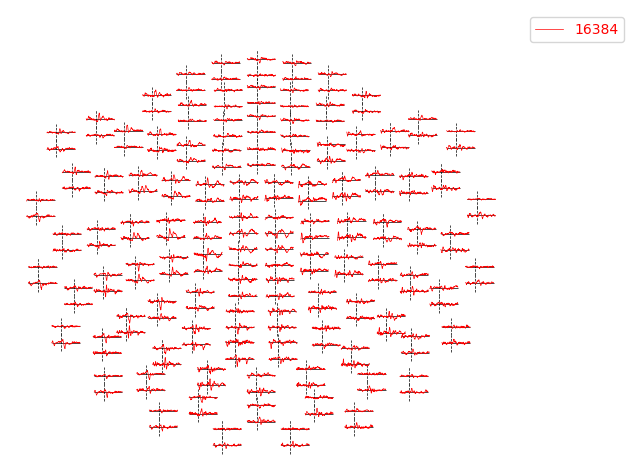

In [9]:
evoked = epochs["16384"].average()
evoked.pick_types('grad').plot_topo(color='r')

## Other Plots

In [12]:
freqs = np.logspace(*np.log10([2, 35]), num=8)
n_cycles = freqs / 2.
power, itc = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)

Loading data for 600 events and 1501 original time points ...


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


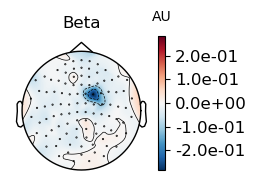

/home/whitney/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
/home/whitney/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
/home/whitney/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
/home/whitney/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)


In [14]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
#power.plot([82], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[82])

#fig, axis = plt.subplots(1, 2, figsize=(7,4))
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12, 
                   baseline=(-0.5, 0), mode='logratio', 
                  title='Alpha', show=False)
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=12, fmax=20, 
                   baseline=(-0.5, 0), mode='logratio',
                  title='Beta', show=False)


In [ ]:
ica_raw.plot(events=events, duration=4)

In [ ]:
epochs.plot_psd(fmin=2., fmax=40., average=True, spatial_colors=False, picks=ica_raw.info["ch_names"])
epochs.plot_psd_topomap(ch_type='grad', normalize=True)

In [ ]:
evoked.plot()

In [10]:
fig = mne.viz.plot_alignment(raw.info, trans=None, dig=False, eeg=False, surfaces=[], meg=['helmet', 'sensors'], coord_frame='meg')
mne.viz.set_3d_view(fig, azimuth=50, elevation=90, distance=0.5)

Getting helmet for system 306m
